Try to find the overlap of clusters that were studied in literature with the area observed by the HSC surveys. 
- Plot all HSC tracts
- Plot positions of studied clusters
- Find overlap

--> found that the tracts significantly overestimate the area that was actually observed in the surveys, so presence of a tract at a cluster location is probably not a very reliable way to tell whether there is actually observational data at that position.

In [193]:
from astropy.coordinates import SkyCoord, concatenate
from astropy import units as u
import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
import pandas
import re

In [65]:
# Read and store the tract information
files = glob.glob("HSC footprint/*DUD*")

dud_tracts = {}

for file in files:
    f = open(file)
    for line in f:
        if re.match("^Tract: [0-9]+  Corner*", line):
            _, tract, _, _, _, ra, dec = re.findall(r'[a-zA-Z0-9.-]+', line)
            tract, ra, dec = float(tract), float(ra) * u.degree, float(dec) * u.degree
            c = SkyCoord(ra=ra, dec=dec, frame='icrs') # Extremely inefficient way to do this lol
            if tract not in dud_tracts:
                dud_tracts[tract] = [[c.ra.wrap_at(180 * u.deg).radian, c.dec.radian]]
            else:
                dud_tracts[tract].append([c.ra.wrap_at(180 * u.deg).radian, c.dec.radian])

In [127]:
# Read and store the tract information
files = glob.glob("HSC footprint/*W*")

wide_tracts = {}

for file in files:
    f = open(file)
    for line in f:
        if re.match("^Tract: [0-9]+  Corner*", line):
            _, tract, _, _, _, ra, dec = re.findall(r'[a-zA-Z0-9.-]+', line)
            tract, ra, dec = float(tract), float(ra) * u.degree, float(dec) * u.degree
            c = SkyCoord(ra=ra, dec=dec, frame='icrs')
            if tract not in wide_tracts:
                wide_tracts[tract] = [[c.ra.wrap_at(180 * u.deg).radian, c.dec.radian]]
            else:
                wide_tracts[tract].append([c.ra.wrap_at(180 * u.deg).radian, c.dec.radian])

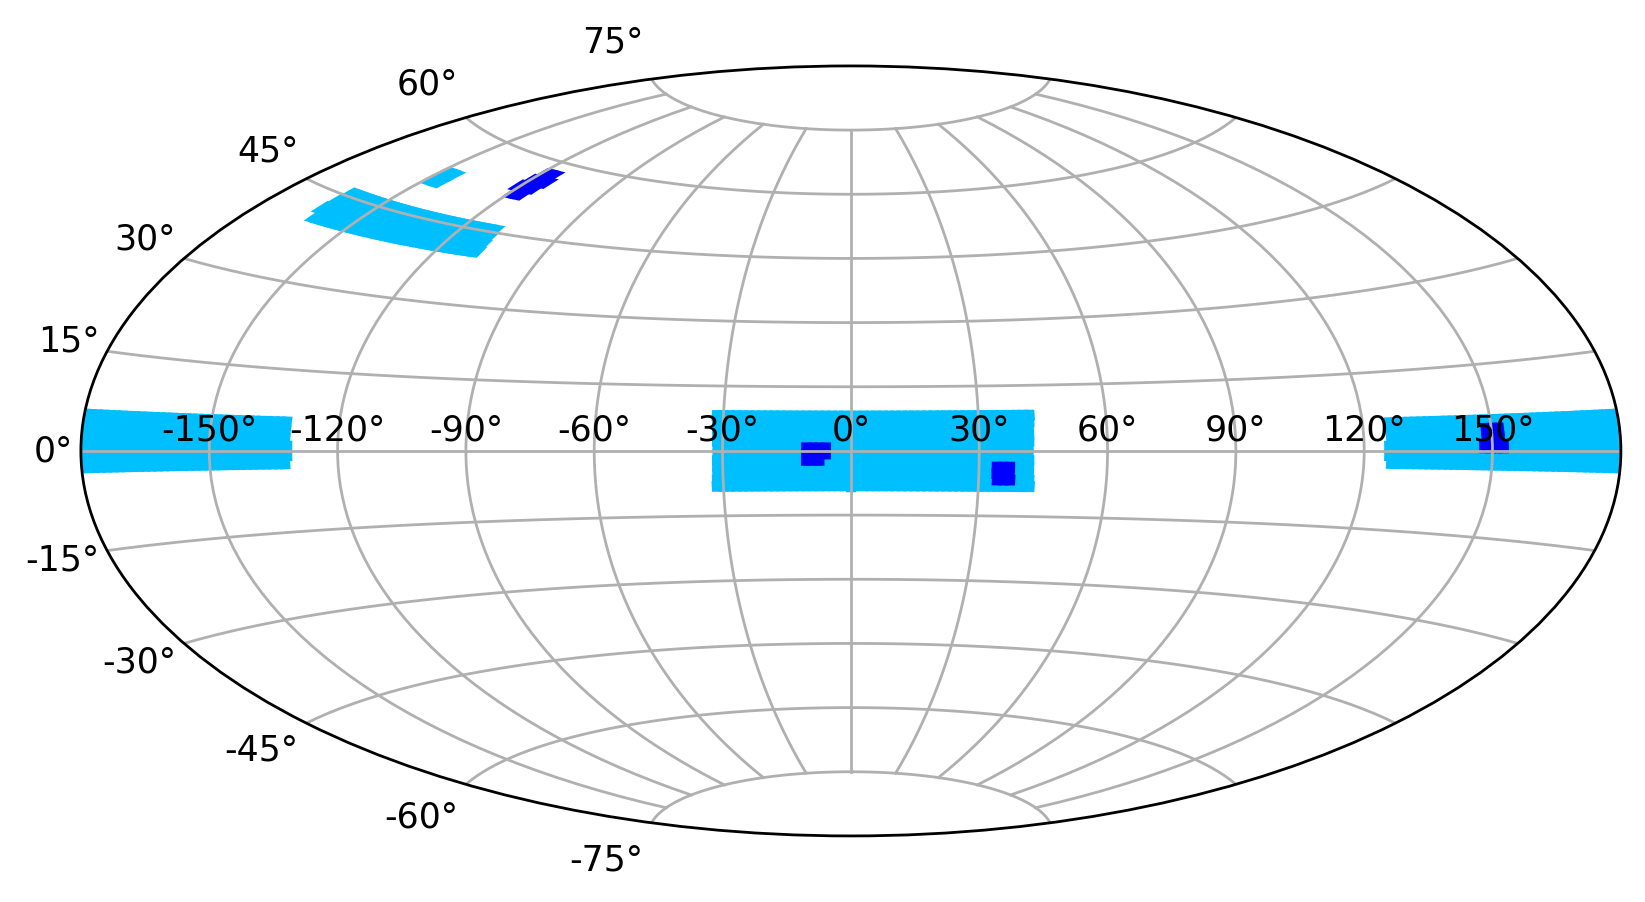

In [208]:
def plot_tracts():
    fig = plt.figure(figsize=(8,4), dpi=250)
    plt.subplot(111, projection='aitoff')
    plt.grid(True)
    ax = plt.gca()

    polygons = []

    for tract in wide_tracts:
        # Check whether the points have wrapped around -> how? 
        points = np.array(wide_tracts[tract])
        if np.prod(points[:,0][:2]) < 0 and np.sum(np.abs(points[:,0])) > 2 * np.pi:
            # Wrap around
            polygon = Polygon(np.array([points[0], np.array([-np.pi, points[0][1]]), points[3], np.array([-np.pi, points[3][1]])]), closed=True, color="deepskyblue")
            polygons.append(polygon)
            polygon = Polygon(np.array([points[1], np.array([np.pi, points[1][1]]), points[2], np.array([np.pi, points[2][1]])]), closed=True, color="deepskyblue")
            polygons.append(polygon)
        else:
            polygon = Polygon(np.array(wide_tracts[tract]), closed=True, color="deepskyblue")
            polygons.append(polygon)

    for p in polygons:
        ax.add_patch(p)

    for tract in dud_tracts:
        polygon = Polygon(np.array(dud_tracts[tract]), closed=True, color='blue')
        ax.add_patch(polygon)
    
plot_tracts()
plt.show()

In [188]:
# Plot the studied clusters
data = pandas.read_excel("./Found ICL.xlsx", sheet_name = "All clusters")
data


,Paper,Link,Cluster,RA,DEC,HSC-Wide?,HSC-DUD?,units,Unnamed: 8,(trying not to have duplicates here)
0,Zwicky (1951),https://articles.adsabs.harvard.edu/pdf/1951PA...,Coma,12h59m48.7s,+27d58m55s,N,N,hms,NaN,NaN
1,Mihos et al (2005),https://iopscience.iop.org/article/10.1086/497...,Virgo,12h27m,+12d43m,N,N,hms,NaN,NaN
2,Feldmeier et al (2002),https://iopscience.iop.org/article/10.1086/341...,A1413,11h55m22.5s,+23d22m18s,N,N,hms,NaN,NaN
3,NaN,NaN,MKW7,14h34m0.9s,+03d46m52s,Y,N,hms,NaN,NaN
4,Krick & Bernstein (2007),https://iopscience.iop.org/article/10.1086/518...,A4059,23h57,-34d40m,N,N,hms,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
345,NaN,NaN,SpARCS-J1049,10h49m22.6s,+56:40:32.6,N,N,hms,NaN,NaN
346,NaN,NaN,IDCS J1426.5 + 3508,14h26m30s,+35d08.0m,N,N,hms,NaN,NaN
347,Chen et al. (2021),https://arxiv.org/pdf/2112.03934.pdf,Doesn't mention - ~3000 clusters from redMaPPe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,Jee (2010),https://iopscience.iop.org/article/10.1088/000...,Cl 0024+17,00h26m35.70s,+17d09m46.0s,N,N,hms,NaN,NaN


In [196]:
# RA and DEC are an absolute unstandardised mess: split into coords in hms vs coords in degrees
hms_data = data[(data == "hms").any(axis=1)]
deg_data = data[(data == "deg").any(axis=1)]

# Make SkyCoords out of them
hms_coords = SkyCoord(hms_data["RA"], hms_data["DEC"], unit=(u.hour, u.deg))
deg_coords = SkyCoord(deg_data["RA"], deg_data["DEC"], unit=(u.deg, u.deg))

coords = concatenate([hms_coords, deg_coords])

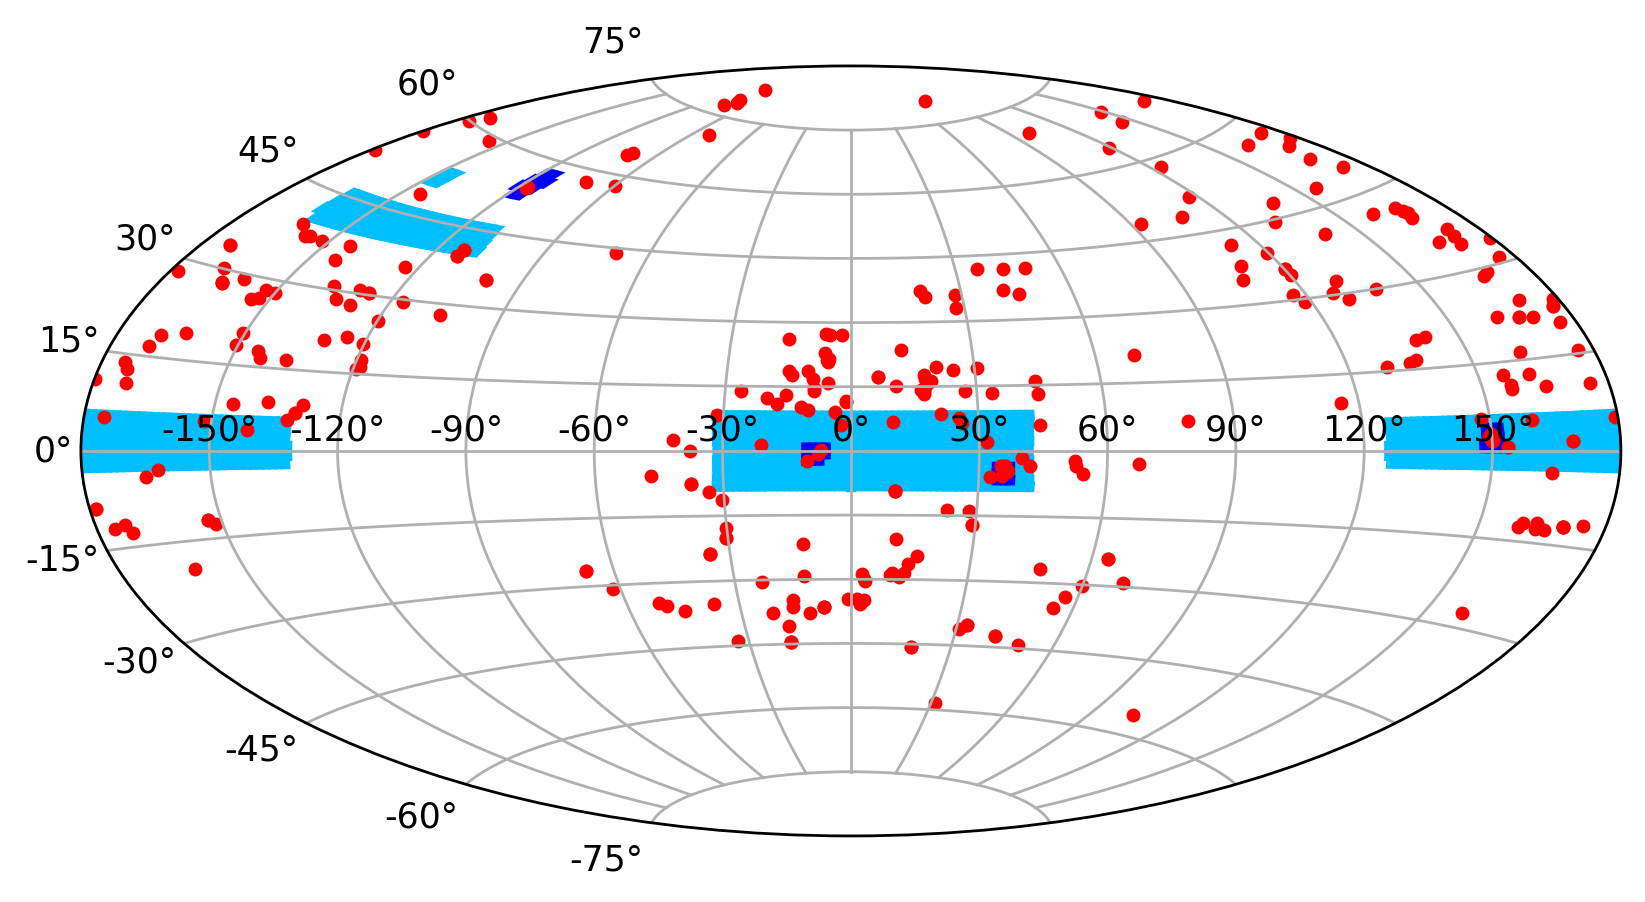

In [209]:
# Plot the coordinates
clusters_ra = coords.ra.wrap_at(180 * u.deg).radian
clusters_dec = coords.dec.radian

plot_tracts()
plt.scatter(clusters_ra, clusters_dec, color="red", marker='.')
plt.show()

In [214]:
# Get the clusters that are within HSC footprint
hsc_clusters = pandas.read_excel("./Found ICL.xlsx", sheet_name = "HSC overlap")

# Make SkyCoords out of them
hms_data = hsc_clusters[(hsc_clusters == "hms").any(axis=1)]
deg_data = hsc_clusters[(hsc_clusters == "deg").any(axis=1)]

# Make SkyCoords out of them
hms_coords = SkyCoord(hms_data["RA"], hms_data["DEC"], unit=(u.hour, u.deg))
deg_coords = SkyCoord(deg_data["RA"], deg_data["DEC"], unit=(u.deg, u.deg))

hsc_coords = concatenate([hms_coords, deg_coords])


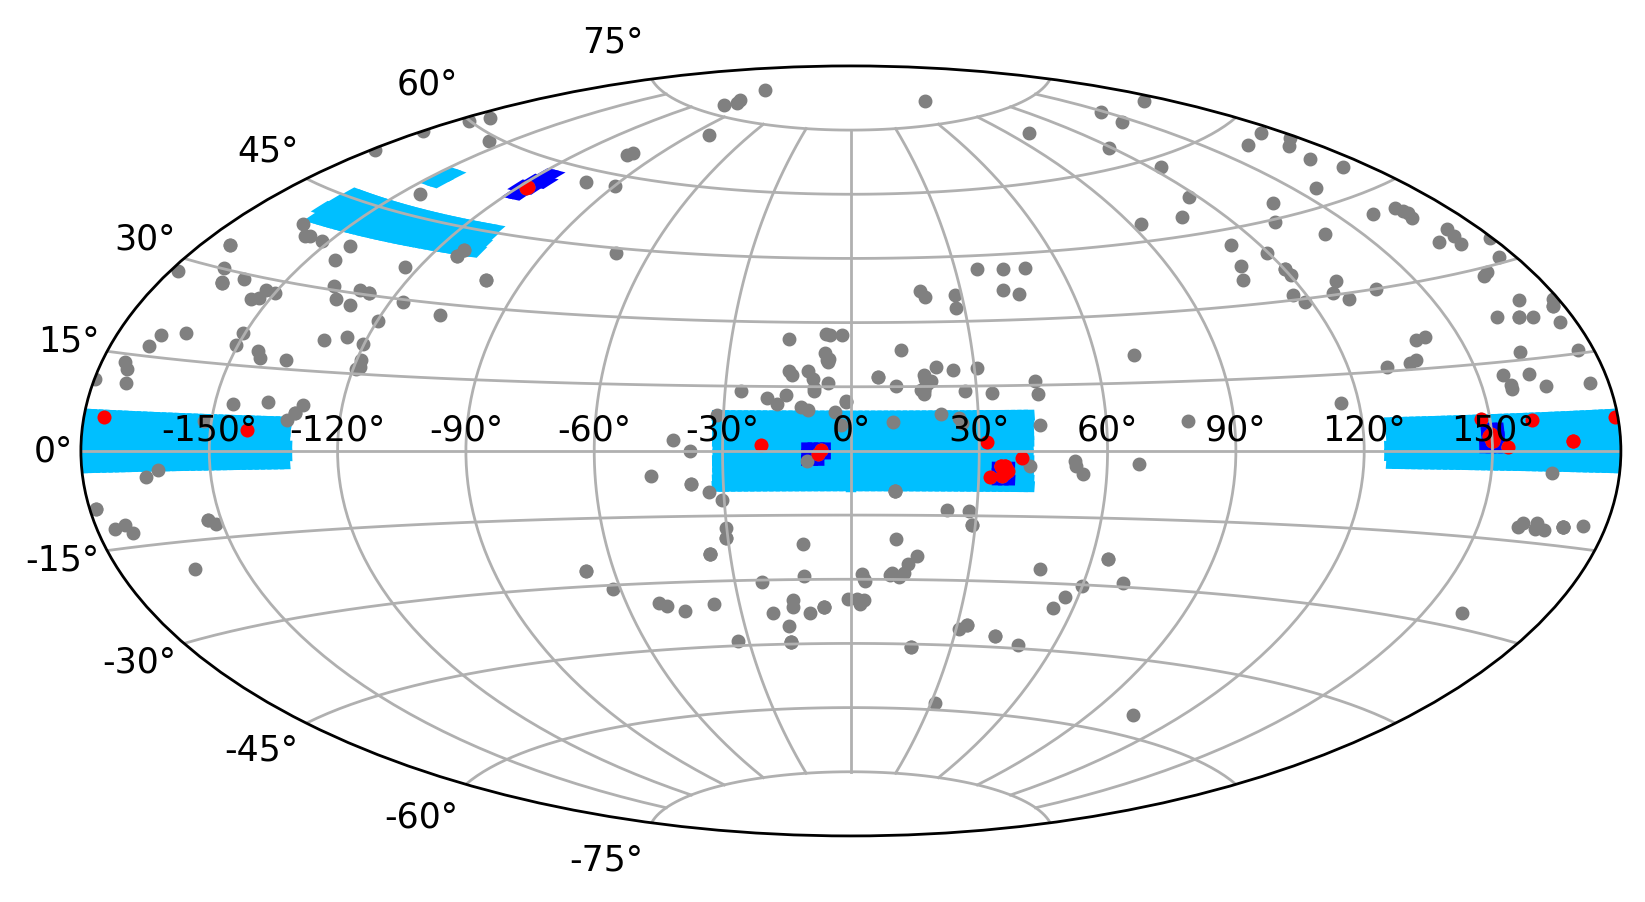

In [260]:
# Plot everything
plot_tracts()
clusters_ra = coords.ra.wrap_at(180 * u.deg).radian
clusters_dec = coords.dec.radian

hsc_clusters_ra = hsc_coords.ra.wrap_at(180 * u.deg).radian
hsc_clusters_dec = hsc_coords.dec.radian

plt.scatter(clusters_ra, clusters_dec, color="gray", marker='.')
plt.scatter(hsc_clusters_ra, hsc_clusters_dec, color="red", marker='.')
plt.show()

In [ ]:
# The tracts aren't a very good indication of which areas of the sky were actually observed...